In [1]:
#Imports

#Import entire numpy library
from numpy import *

#Import entire math library
from math import *

#Import scipy.special library
from scipy.special import *

#Import entire pandas library as pd
import pandas as pd

#Import entire matplotlib
from matplotlib import *

#Import the pyplot function
import matplotlib.pyplot as plt

#This is used for variable display in the GUI
import sys


In [2]:
#Define Input

#rho: Desity of the Medium
p = 1

#Phi_0: Amplitude of the Incident Wave
P = 1

#Betta_1: Complex Shear Wave Number
B1 = 1

#alpha_1 = Complex Longitudinal Wave Number
a1 = 1

#a: radius of the chrystal
a = 1

#omega: angular frequency
w = 1

In [3]:
#Parameter Equations

#N_p
def Np(n):
    return (4 * n**2) + (n+1) * (B1/a1)**2 

#A_n
def An(n):
    p1 = 1
    p2 = 1
    
    if n == 0:
        return -1/3 * 1j * P * (a1*a)**3
        
    if n == 1:
        return -1/3 * 1j * P * (1 - (p2/p1)) * (a1*a)**3
        
    if n > 1:
        return (1j)**(n-1) * P * ( (2**n * factorial(n))/factorial(2*n) )**2 * Np(n)*(a1*a)**(2*n-1)

#B_n
def Bn(n):
    if n == 0:
        return 1
    
    elif n > 0:
        return -(B1/a1)**(n+1) * (An(n)/n)

#mu_1
u1 = p * w**2 / B1

#P_n: Legendre Pollynomials
def Pn(n):
    return legendre(n)
#n: int
#Degree of the polynomial.

#d(P_n)/dtheta: derivatives of Legendre Pollynomials
def dPndtha(m,n,x,tha):
    if n == 0:
        return 0
        
    elif n >= 1:
        if m == 1:
            return -lpmv(1,n,x)
        elif m == 2:
            return -lpmv(1,n,x)*(1/tan(tha))
        else:
            raise TypeError("Invlaid input. The first term should be a 1 or a 2")
        
    elif n > 1:
        if m == 1:
            return -lpmv(1,n,x)
        elif m == 2:
            return lpmv(2,n,x) - lpmv(1,n,x)*(1/tan(tha))
        else:
            raise TypeError("Invlaid input. The first term should be a 1 or a 2")
        

#h_n: Spherical Hankel Function of the first kind
def hn(n,z):
    return hankel1(n,z)
#n: array_like
#Order (float)

#z: array_like
#Argument (float or complex)
#Basically whatever is in the parentheses


#j_n: Spherical Bessel Function of the first kind
def jn(n,z):
    return spherical_jn(n,z)
#n: int, array_like
#Order of the Bessel function (n >= 0)

#z: complex or float, array_like
#Argument of the Bessel function
#Basically whatever is in the parentheses

In [4]:
# This is the stress equation 
def sigphiphi_sum(r,tha):
    sigsum = 0
    
    for n in range(0, 20):
        sigsum += ( ( Pn(n)(cos(tha)) * ( P * (1j)**n * ( 2*n + 1 ) * ( ( (n+ (a1**2) * (r**2)- B1**2 * r**2 )/2) * (jn(n,(a1*r))) - a1*r*jn(n+1,(a1*r)) ) +  An(n) * ( ((n + (a1**2) * (r**2) - (B1**2) * (r**2)/2) * hn(n,(a1*r)) - a1*r*hn(n+1,(a1*r)) ) - Bn(n) * (n + 1) * hn(n,(B1*r))+ (cot(tha))*dPndtha(1,n,cos(tha),tha) * (P * (1j)**n * ( 2*n + 1 ) * jn(n,(a1 * r)) + An(n) * hn(n,(a1 * r)) -Bn(n) *( (n+1)* hn(n,(B1*r)) - B1*r*hn(n+1,(B1*r)) ) ) ) ) ) )
    return sigsum

#Theta array
tha = linspace(0, 2*pi, 20)
#j

#R array
r = arange(a, 20*a + 1, a)
#i

#sigma_phiphi
sigphiphi = zeros( (20,20),dtype = complex )

for i in range(0, r.size):
    for j in range(0, tha.size):
        sigphiphi[i,j] = 2*u1/r[i]**2 * sigphiphi_sum(r[i],tha[j])


NameError: name 'cot' is not defined

In [6]:
#-- Generate Data -----------------------------------------
# Using linspace so that the endpoint of 360 is included...
azimuths = tha
zeniths = r

R, theta = meshgrid(zeniths, azimuths)
values = sigphiphi.real


#-- Plot... ------------------------------------------------
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
ax.contourf(theta, R, values)

plt.show()

NameError: name 'tha' is not defined

In [ ]:
def sigthatha_sum(r,tha):
    sigsum = 0
    
    for n in range(0, 20):
        sigsum += ( ( Pn(n)(cos(tha)) * ( P * (1j)**n * ( 2*n + 1 ) * ( ( (n+ (a1**2) * (r**2)- B1**2 * r**2 )/2) * (jn(n,(a1*r))) - a1*r*jn(n+1,(a1*r)) ) +  An(n) * ( ((n + (a1**2) * (r**2) - (B1**2) * (r**2)/2) * hn(n,(a1*r)) - a1*r*hn(n+1,(a1*r)) ) - Bn(n) * (n + 1) * hn(n,(B1*r)) + dPndtha(2,n,cos(tha),tha) * (P * (1j)**n * ( 2*n + 1 ) * jn(n,(a1 * r)) + An(n) * hn(n,(a1 * r)) -Bn(n) *( (n+1)* hn(n,(B1*r)) - B1*r*hn(n+1,(B1*r)) ) ) ) ) ) )
    return sigsum

#Theta array
tha = linspace(0, 2*pi, 20)
#j

#R array
r = arange(a, 20*a + 1, a)
#i

#sigma_thetatheta
sigthatha = zeros( (20,20),dtype = complex )

for i in range(0, r.size):
    for j in range(0, tha.size):
        sigthatha[i,j] = 2*u1/r[i]**2 * sigthatha_sum(r[i],tha[j])
        
#-- Generate Data -----------------------------------------
# Using linspace so that the endpoint of 360 is included...
azimuths = tha
zeniths = r

R, theta = meshgrid(zeniths, azimuths)
values = sigthatha.real


#-- Plot... ------------------------------------------------
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
ax.contourf(theta, R, values)

plt.show()

In [ ]:
def sigrr_sum(r,tha):
    sigsum = 0
    
    for n in range(0, 20):
        sigsum += Pn(n)(cos(tha)) * ( P * (1j)**n * (2*n + 1) * ( n**2 - n - B1**2 * r**2/2 * ( jn(n,(a1*r)) ) + 2*a1*r*jn(n+1,(a1*r)) ) + An(n) * ( n**2 - n - B1**2 * r**2/2 * ( hn(n,(a1*r))) + 2*a1*r*hn(n+1,(a1*r)) ) - Bn(n) * ( n*(n+1)*(n-1)*hn(n,(B1*r)) - n*(n+1)*B1*r*hn(n+1,(B1*r)) ) )
    return sigsum

#Theta array
tha = linspace(0, 2*pi, 20)
#j

#R array
r = arange(a, 20*a + 1, a)
#i

#sigma_rr
sigrr = zeros( (20,20),dtype = complex )

for i in range(0, r.size):
    for j in range(0, tha.size):
        sigrr[i,j] = 2*u1/r[i]**2 * sigrr_sum(r[i],tha[j])

#-- Generate Data -----------------------------------------
# Using linspace so that the endpoint of 360 is included...
azimuths = tha
zeniths = r

R, theta = meshgrid(zeniths, azimuths)
values = sigrr.real


#-- Plot... ------------------------------------------------
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
ax.contourf(theta, R, values)

plt.show()

In [ ]:
# This is the stress equation for sigma r theta
def sigrtha_sum(r,tha):
    sigsum = 0
    
    for n in range(0, 20):
        sigsum += ( dPndtha(1,n,cos(tha),tha) * ( P * (1j)**n * ( 2*n + 1 ) * ( ( (n-1) * (jn(n,(a1*r))) - a1 * r * jn(n+1,(a1*r)) ) + An(n) * ( ((n- 1) * hn(n,(a1*r)) - a1 * r * hn(n+1,(a1*r)) )- Bn(n) *( ( ( n**2 ) - 1 - (B1 **2) * (r**2) / 2) * hn(n,(B1*r)) +  (B1*r) * hn(n+1,(B1*r)) ) ) ) ) )
    return sigsum

#Theta array
tha = numpy.arange(pi/20, 2*pi - pi/20, pi/10)
#j

r = numpy.arange(a, 20*a + 1, a)
#i

#sigma_rtheta
sigrtha = zeros( (20,20),dtype = complex )

for i in range(0, r.size):
    for j in range(0, tha.size):
        sigrtha[i,j] = 2*u1/r[i]**2 * sigrtha_sum(r[i],tha[j])
        
#-- Generate Data -----------------------------------------
# Using linspace so that the endpoint of 360 is included...
azimuths = tha
zeniths = r

R, theta = meshgrid(zeniths, azimuths)
values = sigrtha.real


#-- Plot... ------------------------------------------------
fig, ax = subplots(subplot_kw=dict(projection='polar'))
ax.contourf(theta, R, values)

show()

In [ ]:
# this is the equation for delta r r
# make E1 and v1 with lambda
# make potential arc tan function 

E1 = 1 # place holder for complex Young modulus related to Lame params
v1 = 1 # place holder for complex Poisson's ratio

def drr_sum(pass,pass):
    dsum = 0

        dsum = arctan(E1) + arctan(sigrr) - arctan((sigrr - v1 * (sigthatha + sigphiphi) ) )
    
    return dsum
    return drr_sum

In [ ]:
# this is the equation for delta theta theta
# make E1 and v1 with lambda
# make potential arc tan function 

E1 = 1 # place holder for complex Young modulus related to Lame params
v1 = 1 # place holder for complex Poisson's ratio

def dthatha_sum(pass,pass):
    dsum = 0

        dsum = arctan(E1) + arctan(sigthatha) - arctan((sigthatha - v1 * (sigrr + sigphiphi)))
    
    return dsum
    return dthatha_sum

In [ ]:
# this is the equation for delta phi phi
# make E1 and v1 with lambda
# make potential arc tan function 

E1 = 1 # place holder for complex Young modulus related to Lame params
v1 = 1 # place holder for complex Poisson's ratio

def dphiphi_sum(pass,pass):
    dsum = 0

        dsum = arctan(E1) + arctan(sigphiphi) - arctan((sigphiphi - v1 * (sigrr + sigthatha)))
    
    return dsum
    return dphiphi_sum

In [ ]:
# this is the equation for delta r theta
# make E1 and v1 with lambda
# make potential arc tan function 

E1 = 1 # place holder for complex Young modulus related to Lame params
v1 = 1 # place holder for complex Poisson's ratio

def drtha_sum(pass,pass):
    dsum = 0

        dsum = arctan(E1) - arctan( (1 + v1) )
    
    return dsum
    return drtha_sum

In [ ]:
# this is the equation for xi r r
# make an absolute value function using abs() 
# make a sin function using math.sin(drr) 
# make E1 and v1 with lambda

sin = 1 # this is a place holder for the moment for the sin function
abs1 = 1 # this is a place holder for the moment for the abs() function
v1 = 1 # place holder for complex Poisson's ratio

def xirr_sum(pass,pass):
    xisum = 0

        xisum = sin(drr) * abs1(sigrr) * (abs1(sigrr - v1 * (sigthatha + sigphiphi)))
    
    return xisum
    return xirr_sum

In [ ]:
# this is the equation for xi theta theta
# make an absolute value function using abs() 
# make a sin function using math.sin(dthatha) 
# make E1 and v1 with lambda

sin1 = 1 # this is a place holder for the moment for the sin function
abs2 = 1 # this is a place holder for the moment for the abs() function
v1 = 1 # place holder for complex Poisson's ratio

def xithatha_sum(pass,pass):
    xisum = 0

        xisum = sin1(dthatha) * abs2(sigthatha) * (abs2(sigthatha - v1 * (sigrr + sigphiphi)))
    
    return xisum
    return xithatha_sum

In [ ]:
# this is the equation for xi phi phi
# make an absolute value function using abs() 
# make a sin function using math.sin(dphiphi) 
# make E1 and v1 with lambda

sin2 = 1 # this is a place holder for the moment for the sin function
abs3 = 1 # this is a place holder for the moment for the abs() function
v1 = 1 # place holder for complex Poisson's ratio

def xiphiphi_sum(pass,pass):
    xisum = 0

        xisum = sin2(dphiphi) * abs3(sigphiphi) * (abs3(sigphiphi - v1 * (sigrr + sigthatha)))
    
    return xisum
    return xiphiphi_sum

In [ ]:
# this is the equation for xi r theta
# make an absolute value function using abs() 
# make a sin function using math.sin(drtha) 
# make E1 and v1 with lambda

sin3 = 1 # this is a place holder for the moment for the sin function
abs4 = 1 # this is a place holder for the moment for the abs() function
v1 = 1 # place holder for complex Poisson's ratio

def xirtha_sum(pass,pass):
    xisum = 0

        xisum = sin3(drtha) * abs4(1 + v1) * (abs4(sigrtha)**2)
    
    return xisum
    return xirtha_sum

In [ ]:
from numpy import *
from matplotlib.pyplot import *

#-- Generate Data -----------------------------------------
# Using linspace so that the endpoint of 360 is included...
azimuths = radians(linspace(0, 360, 20))
zeniths = arange(0, 70, 10)

sigrtha, tha = meshgrid(zeniths, azimuths)
values = random.random((azimuths.size, zeniths.size))
#values = zeros( (azimuths.size, zeniths.size) )

#-- Plot... ------------------------------------------------
fig, ax = subplots(subplot_kw=dict(projection='polar'))
ax.contourf(tha, sigrtha, values)

fig.savefig("plot.png")

In [ ]:
from numpy import *
from matplotlib.pyplot import *

#-- Generate Data -----------------------------------------
# Using linspace so that the endpoint of 360 is included...
azimuths = radians(linspace(0, 360, 20))
zeniths = arange(0, 70, 10)

sigrr_sum, tha = meshgrid(zeniths, azimuths)
values = random.random((azimuths.size, zeniths.size))
#values = zeros( (azimuths.size, zeniths.size) )

#-- Plot... ------------------------------------------------
fig, ax = subplots(subplot_kw=dict(projection='polar'))
ax.contourf(tha, sigrr_sum, values)

show()

In [ ]:
from numpy import *
from matplotlib.pyplot import *

#-- Generate Data -----------------------------------------
# Using linspace so that the endpoint of 360 is included...
azimuths = radians(linspace(0, 360, 20))
zeniths = arange(0, 70, 10)

sigphiphi, tha = meshgrid(zeniths, azimuths)
values = random.random((azimuths.size, zeniths.size))
#values = zeros( (azimuths.size, zeniths.size) )

#-- Plot... ------------------------------------------------
fig, ax = subplots(subplot_kw=dict(projection='polar'))
ax.contourf(tha, sigphiphi, values)

show()

In [16]:
print(values.shape)


(20, 7)


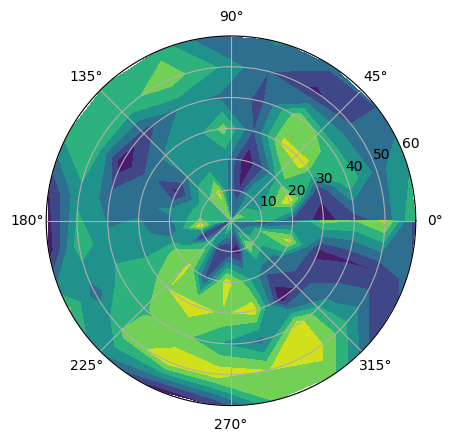

In [11]:
from numpy import *
from matplotlib.pyplot import *

#-- Generate Data -----------------------------------------
# Using linspace so that the endpoint of 360 is included...
azimuths = radians(linspace(0, 360, 20))
zeniths = arange(0, 70, 10)

sigthatha, tha = meshgrid(zeniths, azimuths)
values = random.random((azimuths.size, zeniths.size))
#values = zeros( (azimuths.size, zeniths.size) )

#-- Plot... ------------------------------------------------
fig, ax = subplots(subplot_kw=dict(projection='polar'))
ax.contourf(tha, sigthatha, values)

show()